<center>
    <a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%204/images/IDSNlogo.png" width="300"> </a>
</center>


# From Modeling to Evaluation


Estimated time needed: **20** minutes
    

## Objectives

After completing this lab you will be able to:

* Create Models
* Evaluate the models


## Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Recap](#0)<br>
2. [Data Modeling](#2)<br>
3. [Model Evaluation](#4)<br>
</div>
<hr>


# Recap <a id="0"></a>

In Lab **From Understanding to Preparation**, we explored the data and prepared it for modeling.


This recipe data was compiled by a researcher named Yong-Yeol Ahn, who scraped tens of thousands of food recipes (cuisines and ingredients) from three different websites, namely:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig3_allrecipes.png" width="500">
<div align="center">
www.allrecipes.com
</div>
<br/><br/>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig4_epicurious.png" width="500">
<div align="center">
www.epicurious.com
</div>
<br/><br/>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig5_menupan.png" width="500">
<div align="center">
www.menupan.com
</div>
<br/><br/>


For more information on Yong-Yeol Ahn and his research, you can read his paper on [Flavor Network and the Principles of Food Pairing](http://yongyeol.com/papers/ahn-flavornet-2011.pdf).


<strong>Important note:</strong> Please note that you are not expected to know how to program in Python. The following code is meant to illustrate the stage of data collection, so it is totally fine if you do not understand the individual lines of code. You can access a full course in this certificate on programming in Python, <a href="http://cocl.us/PY0101EN_DS0103EN_LAB4_PYTHON_edX">Python for Data Science</a>, which will teach you how to program in Python if you decide to complete this certificate.


### Using this notebook:

To run any of the following cells of code, you can type **Shift + Enter** to excute the code in a cell.


First, download the library and dependencies that you will need to run this lab.


In [1]:
import pandas as pd # import library to read data into dataframe
pd.set_option("display.max_columns", None)
import numpy as np # import numpy library
import re # import library for regular expression
import random # library for random number generation

We already placed the data on an IBM server for your convenience, so download the data from the server and read the data into a dataframe called **recipes**.


In [2]:
#recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")
recipes = pd.read_csv("recipes.csv")
print("Data read into dataframe!") # takes about 30 seconds

Data read into dataframe!


Next, repeat the preprocessing steps that you implemented in the lab **From Understanding to Preparation** to prepare the data for modeling. For more details on preparing the data, please refer to the Lab **From Understanding to Preparation**.


In [3]:
# fix name of the column displaying the cuisine
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# convert cuisine names to lower case
recipes["cuisine"] = recipes["cuisine"].str.lower()

# make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"


# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

<hr>


# Data Modeling <a id="2"></a>


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%204/images/flowchart_data_modeling.png" width="500">


Now download and install more libraries and dependencies to build decision trees.


In [4]:
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

import graphviz

from sklearn.tree import export_graphviz

import itertools

Check the data again!


In [5]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

## [bamboo_tree] Only Asian and Indian Cuisines

Aquí, está creando un árbol de decisiones para las recetas de algunas de las cocinas asiática (coreana, japonesa, china, tailandesa) e india. El motivo de esta acción es que el árbol de decisión no funciona bien cuando los datos están sesgados hacia una cocina o un grupo de cocinas, como en este caso, las cocinas americanas. Podemos excluir las cocinas estadounidenses de nuestro análisis o simplemente construir árboles de decisión para diferentes subconjuntos de datos. Vayamos con la segunda solución.


Construyamos nuestro árbol de decisiones utilizando los datos relacionados con las cocinas asiática e india y llamemos a nuestro árbol de decisiones *bamboo_tree*.

In [10]:
# select subset of cuisines
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_recipes["cuisine"]
ingredients = asian_indian_recipes.iloc[:,1:]

bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


Let's plot the decision tree and examine what the decision tree looks like.


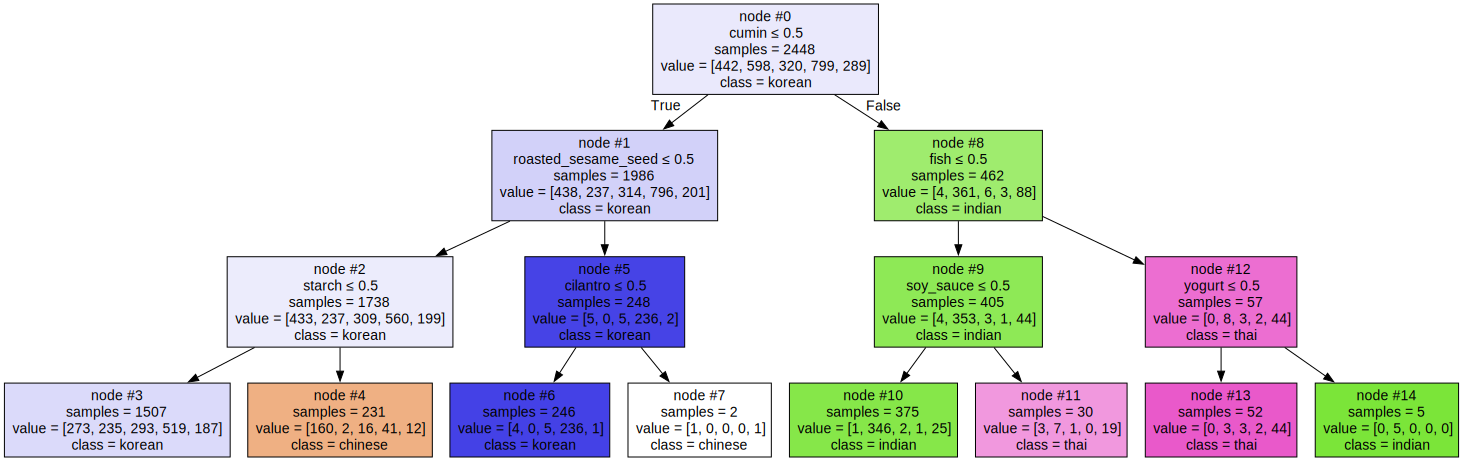

In [11]:
export_graphviz(bamboo_tree,
                feature_names=list(ingredients.columns.values),
                out_file="bamboo_tree.dot",
                class_names=np.unique(cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_tree.dot") as bamboo_tree_image:
    bamboo_tree_graph = bamboo_tree_image.read()
graphviz.Source(bamboo_tree_graph)

El árbol de decisión aprendió:
* Si una receta contiene *comino* y *pescado* y **no** *yogur*, lo más probable es que sea una receta **tailandesa**.
* Si una receta contiene *comino* pero **no** *pescado* y **no** *salsa de soja*, lo más probable es que sea una receta **india**.

Puedes analizar las ramas restantes del árbol para encontrar reglas similares para determinar la cocina de diferentes recetas.

Siéntase libre de seleccionar otro subconjunto de cocinas y crear un árbol de decisiones con sus recetas. Puede seleccionar algunas cocinas europeas y crear árboles de decisión para explorar los ingredientes que diferencian esas cocinas.

# Model Evaluation <a id="4"></a>


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%204/images/flowchart_evaluation.png" width="500">


A continuación, para evaluar nuestro modelo de cocina asiática e india, dividirá el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba. Construirás el árbol de decisiones utilizando el conjunto de entrenamiento. Luego, probará el modelo en el conjunto de prueba y comparará las cocinas que predice el modelo con las cocinas reales.

Primero cree un nuevo marco de datos utilizando solo los datos pertenecientes a las cocinas asiática e india, y llamemos al nuevo marco de datos **bambú**.

In [12]:
bamboo = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]

Now see how many recipes exist for each cuisine.


In [13]:
bamboo["cuisine"].value_counts()

cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64

Let's remove 30 recipes from each cuisine to use as the test set, and let's name this test set **bamboo_test**.


In [14]:
# set sample size
sample_n = 30

Next, create a dataframe containing 30 recipes from each cuisine, selected randomly.


In [15]:
# take 30 recipes from each cuisine
random.seed(1234) # set random seed
bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))

bamboo_test_ingredients = bamboo_test.iloc[:,1:] # ingredients
bamboo_test_cuisines = bamboo_test["cuisine"] # corresponding cuisines or labels

Check that there are 30 recipes for each cuisine.


In [16]:
# check that we have 30 recipes from each cuisine
bamboo_test["cuisine"].value_counts()

cuisine
chinese     30
indian      30
japanese    30
korean      30
thai        30
Name: count, dtype: int64

Now create the training set by removing the test set from the **bamboo** data set, and name the training set **bamboo_train**.


In [17]:
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]

bamboo_train_ingredients = bamboo_train.iloc[:,1:] # ingredients
bamboo_train_cuisines = bamboo_train["cuisine"] # corresponding cuisines or labels

Verify that there are 30 _fewer_ recipes now for each cuisine.


In [18]:
bamboo_train["cuisine"].value_counts()

cuisine
korean      769
indian      568
chinese     412
japanese    290
thai        259
Name: count, dtype: int64

Let's build the decision tree using the training set, **bamboo_train**, and name the generated tree **bamboo_train_tree** for prediction.


In [23]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=20)
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)

print("Decision tree model saved to bamboo_train_tree!")

Decision tree model saved to bamboo_train_tree!


Let's plot the decision tree and explore it.


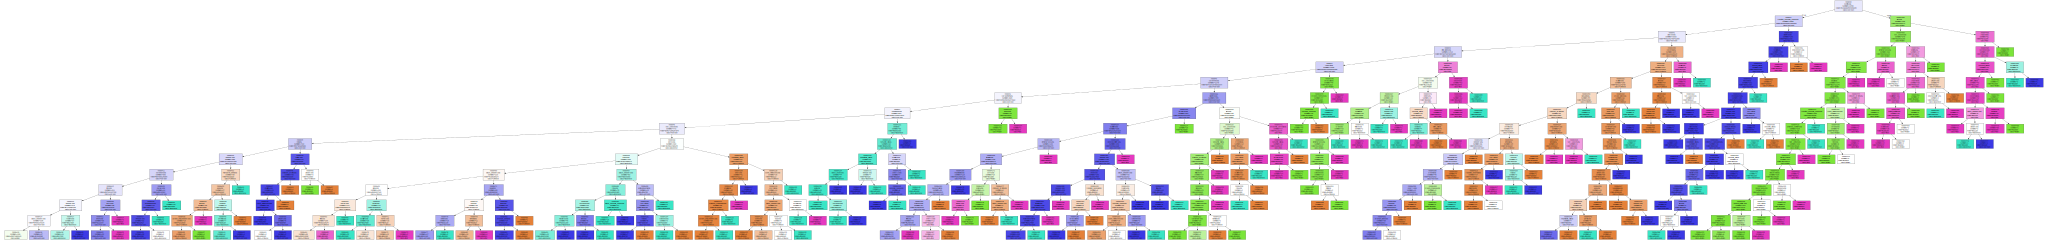

In [20]:
export_graphviz(bamboo_train_tree,
                feature_names=list(bamboo_train_ingredients.columns.values),
                out_file="bamboo_train_tree.dot",
                class_names=np.unique(bamboo_train_cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_train_tree.dot") as bamboo_train_tree_image:
    bamboo_train_tree_graph = bamboo_train_tree_image.read()
graphviz.Source(bamboo_train_tree_graph)

Ahora que definiste nuestro árbol para que sea más profundo, se generan más nodos de decisión.

#### Ahora probemos nuestro modelo con los datos de prueba.

In [24]:
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)

Para cuantificar qué tan bien el árbol de decisión es capaz de determinar correctamente la cocina de cada receta, crearemos una matriz de confusión que presenta un buen resumen de cuántas recetas de cada cocina están clasificadas correctamente. También arroja algo de luz sobre qué cocinas se confunden con otras cocinas.

Entonces, sigamos adelante y creemos la matriz de confusión sobre qué tan bien el árbol de decisión puede clasificar correctamente las recetas en **bamboo_test**.

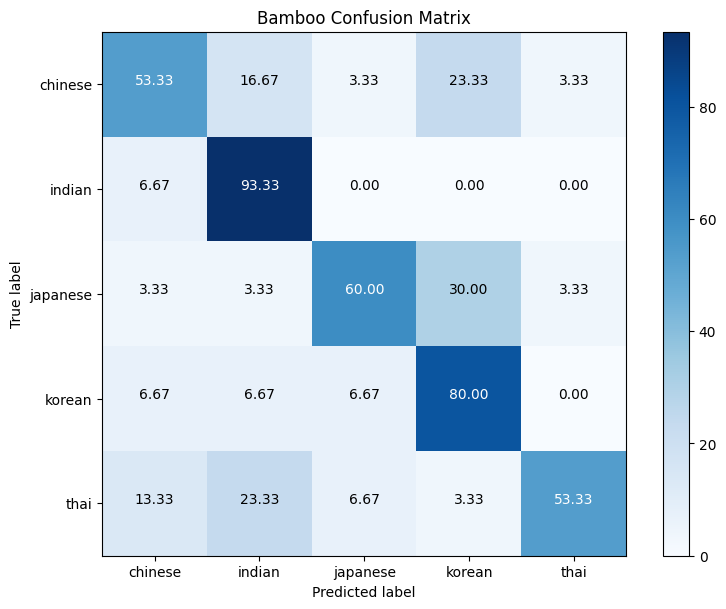

In [25]:
test_cuisines = np.unique(bamboo_test_cuisines)
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, labels = test_cuisines)
title = 'Bamboo Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

Las filas representan las cocinas reales del conjunto de datos y las columnas representan las previstas. Cada fila debe sumar 100%. De acuerdo con esta matriz de confusión, hacemos las siguientes observaciones:

* Utilizando la primera fila de la matriz de confusión, el 60 % de las recetas **chinas** en **bamboo_test** se clasificaron correctamente en nuestro árbol de decisiones, mientras que el 37 % de las recetas **chinas** se clasificaron erróneamente como **coreanas. ** y el 3% fueron clasificados erróneamente como **indios**.

* Usando la fila india, el 77% de las recetas **indias** en **bamboo_test** fueron clasificadas correctamente por nuestro árbol de decisión y el 3% de las recetas **indias** fueron clasificadas erróneamente como **chinas** y 13 El % se clasificó erróneamente como **coreano** y el 7% se clasificó erróneamente como **tailandés**.

**Tenga en cuenta** que debido a que los árboles de decisión se crean utilizando un muestreo aleatorio de los puntos de datos en el conjunto de entrenamiento, es posible que no obtenga los mismos resultados cada vez que cree el árbol de decisión, incluso usando el mismo conjunto de entrenamiento. ¡Sin embargo, el rendimiento debería ser comparable! Así que no se preocupe si obtiene números ligeramente diferentes en su matriz de confusión que los que se muestran arriba.

Usando la matriz de confusión de referencia, ¿cuántas recetas **japonesas** fueron clasificadas correctamente por nuestro árbol de decisión?

<details><summary>Click here for a solution</summary>

```python
    #The correct answer is:
    36.67%.
```

</details>


Also using the reference confusion matrix, how many **Korean** recipes were misclassified as **Japanese**?


<details><summary>Click here for a solution</summary>

```python
    #The correct answer is:
     3.33%.
```

</details>


What cuisine has the least number of recipes correctly classified by the decision tree using the reference confusion matrix?


<details><summary>Click here for a solution</summary>

```python
    #The correct answer is:
     Japanese cuisine, with 36.67% only.
```

</details>


<br>
<hr>


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/aklson/" target="_blank">Alex Aklson</a>



## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-08-16 | 2.3| Patsy | Updated minor grammar items |
| 2021-04-06 | 2.2 | Malika | Updated the data set link |
| 2020-09-25  | 2.1  | Lakshmi  | Fixed typo errors |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |


<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
